In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/realistic_linear_regression_dataset.csv')

In [2]:
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductCategory      2000 non-null   object 
 1   Region               2000 non-null   object 
 2   CustomerSegment      2000 non-null   object 
 3   IsPromotionApplied   2000 non-null   object 
 4   ProductionCost       2000 non-null   float64
 5   MarketingSpend       2000 non-null   float64
 6   SeasonalDemandIndex  2000 non-null   float64
 7   CompetitorPrice      2000 non-null   float64
 8   CustomerRating       2000 non-null   float64
 9   EconomicIndex        2000 non-null   float64
 10  StoreCount           2000 non-null   int64  
 11  SalesRevenue         2000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 187.6+ KB


In [4]:
df.describe()

,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,499.969606,201.273420,1.484039,299.586427,3.999551,100.220798,48.674500,2072.857450
std,98.840116,49.953760,0.503743,81.524787,0.497141,19.176983,28.940548,346.007903
min,129.120339,46.777157,-0.527025,46.020085,2.449741,36.004789,1.000000,1094.518587
25%,434.452593,167.001091,1.150430,241.267538,3.656696,87.297706,23.000000,1808.106571
50%,500.600031,201.052487,1.485411,301.346897,3.985916,99.951705,49.000000,2068.173855
75%,566.588504,235.146602,1.826129,355.093381,4.338487,112.597996,74.000000,2341.223175
max,865.770180,379.973339,3.046715,552.443030,5.550593,164.320403,99.000000,3115.114292


In [5]:
df.isnull().sum()

ProductCategory        0
Region                 0
CustomerSegment        0
IsPromotionApplied     0
ProductionCost         0
MarketingSpend         0
SeasonalDemandIndex    0
CompetitorPrice        0
CustomerRating         0
EconomicIndex          0
StoreCount             0
SalesRevenue           0
dtype: int64

In [6]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: ProductCategory
['Furniture' 'Toys' 'Electronics' 'Clothing']

Column: Region
['East' 'West' 'South' 'North']

Column: CustomerSegment
['High Income' 'Middle Income' 'Low Income']

Column: IsPromotionApplied
['Yes' 'No']


In [7]:
df_encoded = df.copy()
df_encoded['IsPromotionApplied'] = df_encoded['IsPromotionApplied'].map({'Yes': 1, 'No': 0})

categorical_cols = ['ProductCategory', 'Region', 'CustomerSegment']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype(int)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['ProductionCost', 'MarketingSpend', 'SeasonalDemandIndex', 'CompetitorPrice', 
            'CustomerRating', 'EconomicIndex', 'StoreCount', 'SalesRevenue']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


df_processed = df_encoded.copy()

df_processed.info()
df_processed.to_csv('../data/processed/SalesRevenue_processed.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   IsPromotionApplied             2000 non-null   int64  
 1   ProductionCost                 2000 non-null   float64
 2   MarketingSpend                 2000 non-null   float64
 3   SeasonalDemandIndex            2000 non-null   float64
 4   CompetitorPrice                2000 non-null   float64
 5   CustomerRating                 2000 non-null   float64
 6   EconomicIndex                  2000 non-null   float64
 7   StoreCount                     2000 non-null   float64
 8   SalesRevenue                   2000 non-null   float64
 9   ProductCategory_Electronics    2000 non-null   int64  
 10  ProductCategory_Furniture      2000 non-null   int64  
 11  ProductCategory_Toys           2000 non-null   int64  
 12  Region_North                   2000 non-null   i

(X) Trainning Shape: (1600, 16)
(X) Test Shape: (400, 16)

=== Regresión Lineal Múltiple ===
MAE Train: 88.4384
RMSE Train: 111.1669
R² Train: 0.8966

---
MAE Test: 87.1398
RMSE Test: 106.5111
R² Test: 0.9056


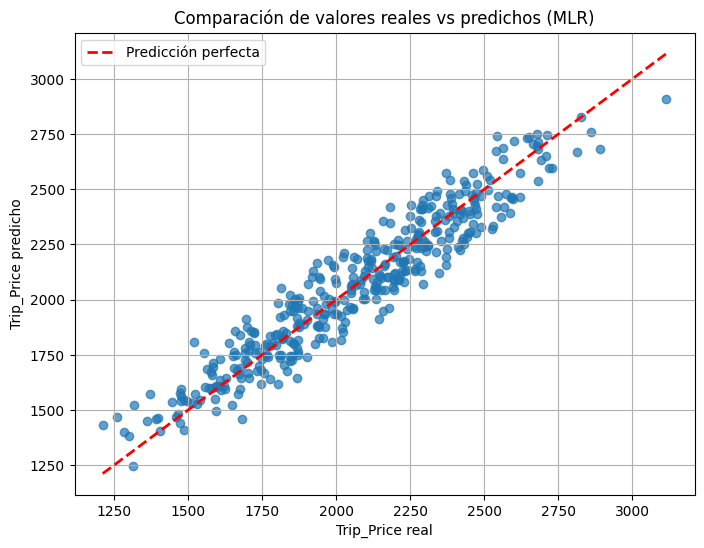

In [8]:
X = df_processed.drop(columns=["SalesRevenue"])
y = df["SalesRevenue"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"(X) Trainning Shape: {X_train.shape}")
print(f"(X) Test Shape: {X_test.shape}")

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
r2_test_lr = r2_score(y_test, y_test_pred_lr)

print("\n=== Regresión Lineal Múltiple ===")
print(f"MAE Train: {mae_train_lr:.4f}")
print(f"RMSE Train: {rmse_train_lr:.4f}")
print(f"R² Train: {r2_train_lr:.4f}")
print("\n---")
print(f"MAE Test: {mae_test_lr:.4f}")
print(f"RMSE Test: {rmse_test_lr:.4f}")
print(f"R² Test: {r2_test_lr:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel("Trip_Price real")
plt.ylabel("Trip_Price predicho")
plt.title("Comparación de valores reales vs predichos (MLR)")
plt.legend()
plt.grid(True)
plt.show()



=== Métricas de Entrenamiento ===
MAE Train: 59.6328
RMSE Train: 76.0834
R² Train: 0.9516

=== Métricas de Test ===
MAE Test: 92.0911
RMSE Test: 114.7420
R² Test: 0.8904


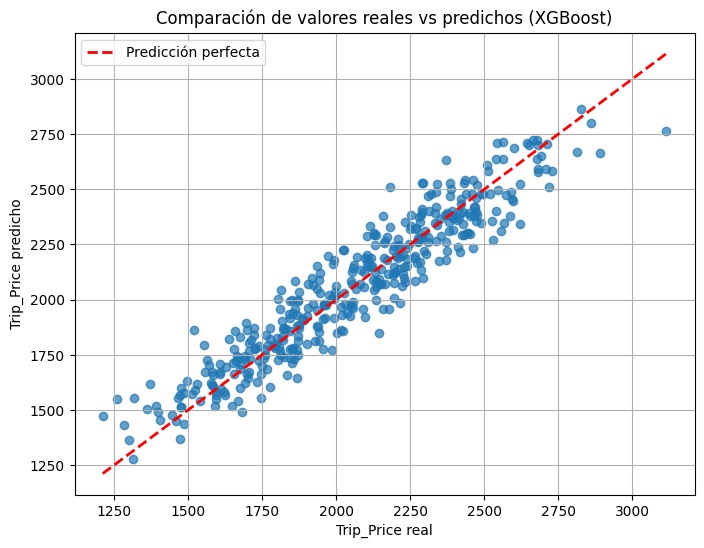

In [9]:
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0
)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print("\n=== Métricas de Entrenamiento ===")
print(f"MAE Train: {mae_train:.4f}")
print(f"RMSE Train: {rmse_train:.4f}")
print(f"R² Train: {r2_train:.4f}")

print("\n=== Métricas de Test ===")
print(f"MAE Test: {mae_test:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")
print(f"R² Test: {r2_test:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel("Trip_Price real")
plt.ylabel("Trip_Price predicho")
plt.title("Comparación de valores reales vs predichos (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()

Epoch 0/200, Loss: 4403228.4300
Epoch 20/200, Loss: 52883.0569
Epoch 40/200, Loss: 15292.9556
Epoch 60/200, Loss: 12523.0154
Epoch 80/200, Loss: 12168.7575
Epoch 100/200, Loss: 12178.0938
Epoch 120/200, Loss: 11944.7862
Epoch 140/200, Loss: 11691.3720
Epoch 160/200, Loss: 11858.5220
Epoch 180/200, Loss: 11818.6492

=== Red Neuronal (PyTorch) ===
MAE Train: 84.9063
RMSE Train: 107.0899
R² Train: 0.9040

---
MAE Test: 92.8174
RMSE Test: 112.9496
R² Test: 0.8938


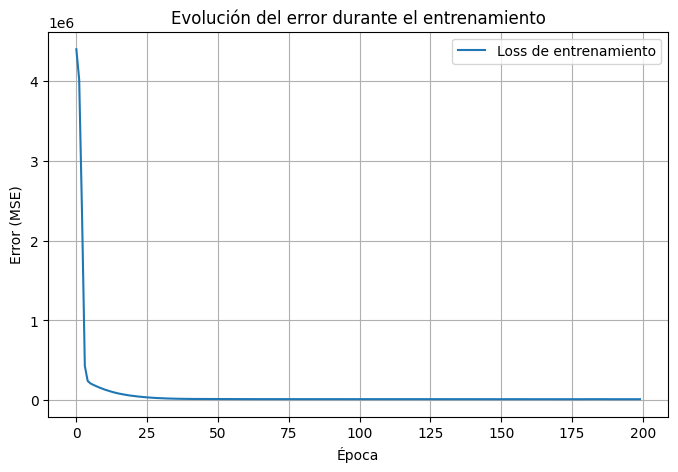

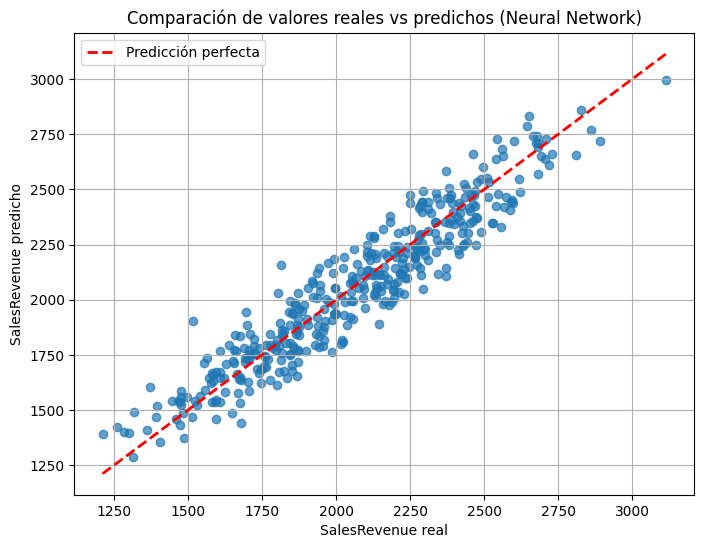

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class SalesRevenueNN(nn.Module):
    def __init__(self, input_dim):
        super(SalesRevenueNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)


input_dim = X_train.shape[1]
model = SalesRevenueNN(input_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


epochs = 200
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))
    if epoch % 20 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")



model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor).numpy()
    y_pred = model(X_test_tensor).numpy()

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print("\n=== Red Neuronal (PyTorch) ===")
print(f"MAE Train: {mae_train:.4f}")
print(f"RMSE Train: {rmse_train:.4f}")
print(f"R² Train: {r2_train:.4f}")
print("\n---")
print(f"MAE Test: {mae_test:.4f}")
print(f"RMSE Test: {rmse_test:.4f}")
print(f"R² Test: {r2_test:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Loss de entrenamiento")
plt.xlabel("Época")
plt.ylabel("Error (MSE)")
plt.title("Evolución del error durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción perfecta')
plt.xlabel("SalesRevenue real")
plt.ylabel("SalesRevenue predicho")
plt.title("Comparación de valores reales vs predichos (Neural Network)")
plt.legend()
plt.grid(True)
plt.show()
